In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('car_age_price.csv')

In [5]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [6]:
df.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [7]:
df.shape

(112, 2)

In [8]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
df.isnull().sum()

Year     0
Price    0
dtype: int64

In [12]:
df.Year.value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

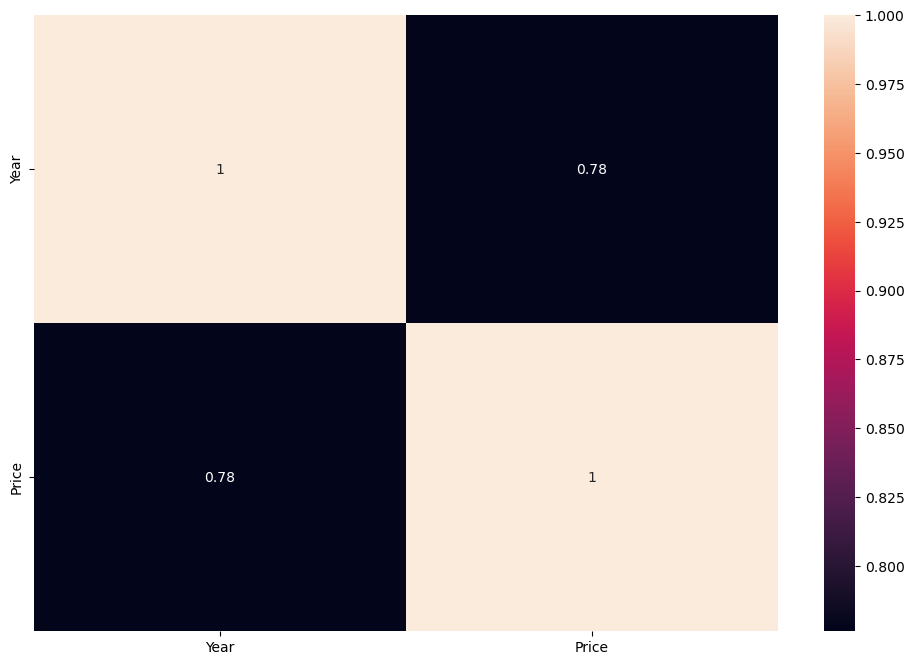

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

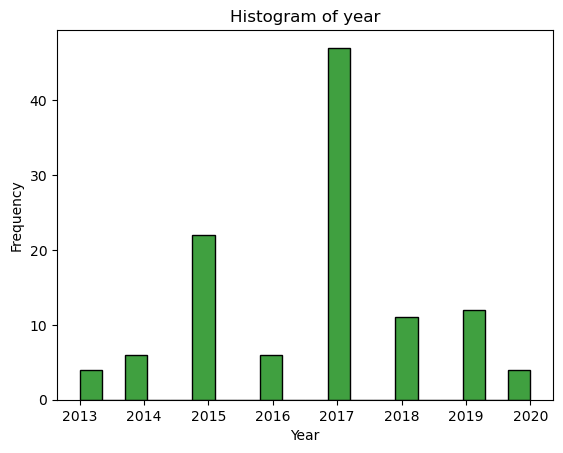

In [17]:
sns.histplot(df['Year'], bins=20, kde=False, color='green')
plt.title('Histogram of year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

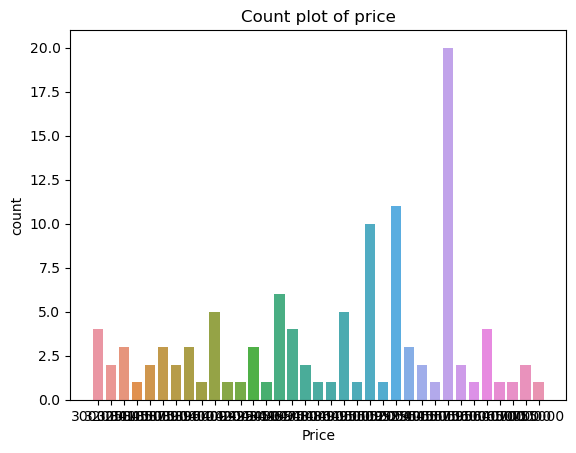

In [18]:
sns.countplot(x=df['Price']);
plt.title('Count plot of price')
plt.plot();

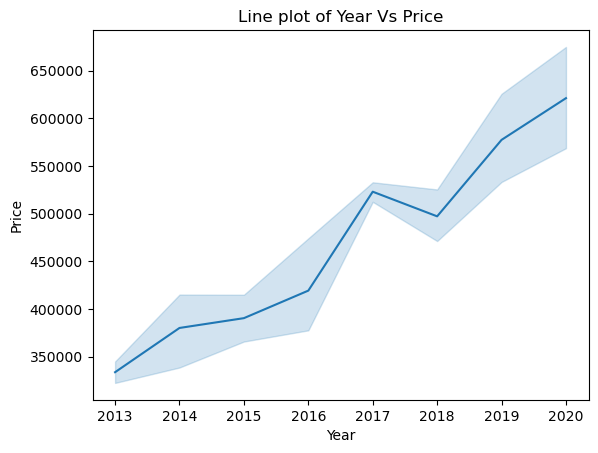

In [19]:
sns.lineplot(x='Year',y='Price', data=df)
plt.title('Line plot of Year Vs Price')
plt.plot();

<Axes: xlabel='Year', ylabel='Price'>

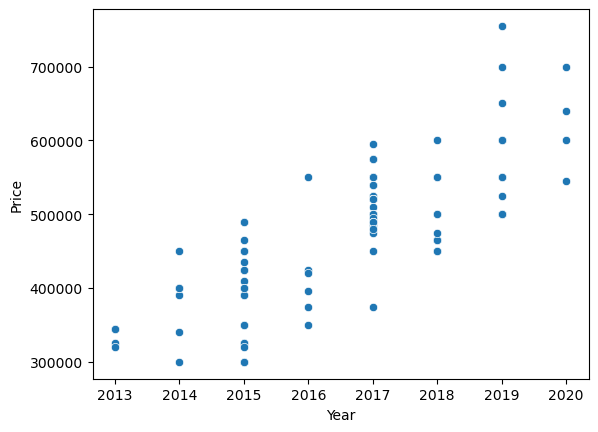

In [20]:
sns.scatterplot(x='Year',y='Price',data=df)

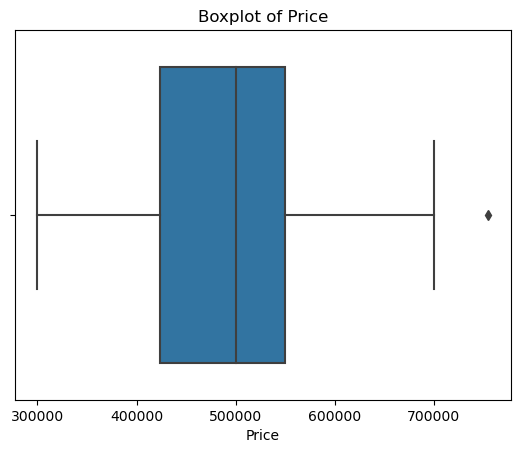

In [21]:
sns.boxplot(data=df, x='Price')
plt.title('Boxplot of Price')
plt.show()

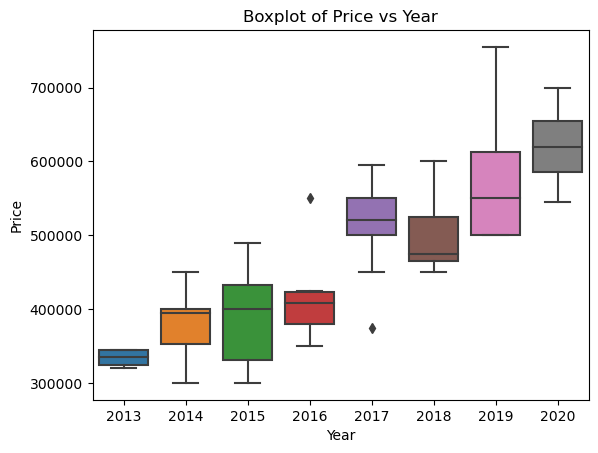

In [22]:
sns.boxplot(data=df, x='Year',y='Price')
plt.title('Boxplot of Price vs Year')
plt.show()

In [23]:
#Creating dataframe for features
X = df[['Year']]

#Creating dataframe for target
y = df['Price']

In [24]:
print(X.shape,y.shape)

(112, 1) (112,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [32]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 1) (23, 1) (89,) (23,)


In [34]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test) 
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [35]:
accuracy_lr = lr_model.score(X_test, y_pred)
print(accuracy_lr)

1.0


In [37]:
import numpy as np

In [38]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.77957001264
Mean Squared Error: 4326906256.829671
RMSE: 65779.22
R^2 Score: 0.37


In [39]:
# Extract coefficients #y =mx+c
slope = lr_model.coef_[0] #slope = m
intercept = lr_model.intercept_ #c

# Display intercepts
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: 47608.56780807661
Y-Intercept: -95520922.49198586


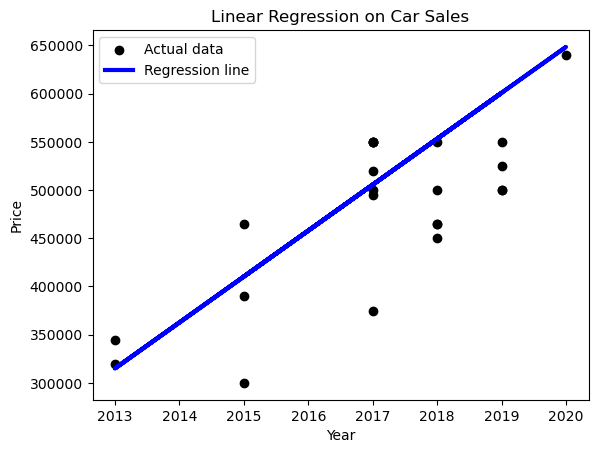

In [40]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car Sales')
plt.legend()
plt.show()

In [41]:
# define new data
year = [2022]
# make a prediction
pred = lr_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:743601.615945


/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
# Create a Linear Regression model
lar_model = Lasso(alpha=1.0)

# Train the model on the training set
lar_model.fit(X_train, y_train)

# Make predictions on the test set
yr_pred = lar_model.predict(X_test) 
yr_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [43]:
accuracy_lar = lar_model.score(X_test, yr_pred)
print(accuracy_lar)

1.0


In [44]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, yr_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yr_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, yr_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, yr_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.33030898286
Mean Squared Error: 4326859771.015669
RMSE: 65778.87
R^2 Score: 0.37


In [45]:
# Extract coefficients #y =mx+c
slope = lar_model.coef_[0] #slope = m
intercept = lar_model.intercept_ #c

# Display intercepts
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: 47608.155599500424
Y-Intercept: -95520091.24791841


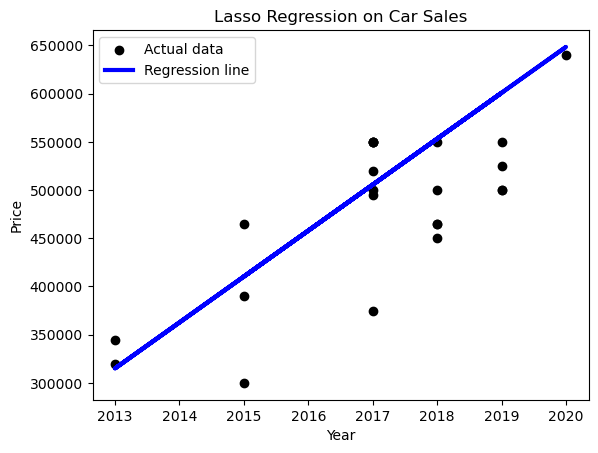

In [46]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, yr_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression on Car Sales')
plt.legend()
plt.show()

In [47]:
# define new data
year = [2022]
# make a prediction
pred = lar_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:743599.374271


/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [52]:
rf_model = RandomForestRegressor(n_estimators= 100, max_depth=25) #Instantiate an object

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = lr_model.predict(X_test) 

In [53]:
accuracy_dr = rf_model.score(X_test, rf_pred)
accuracy_dr

0.885914017525347

In [54]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error #MAE

mae = mean_absolute_error(y_test, rf_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {mse}')

# Assuming y_pred and y_test are NumPy arrays or similar data structures
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
# Assuming y_pred and y_test are NumPy arrays or similar data structures
r2 = r2_score(y_test, rf_pred)

print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.77957001264
Mean Squared Error: 4326906256.829671
RMSE: 65779.22
R^2 Score: 0.37


In [55]:
# define new data
year = [2022]
# make a prediction
pred = rf_model.predict([year])
# summarize prediction
print('Predicted:%3f' % pred)

Predicted:613969.906205


/Users/rahuludayakumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
